### Project 1 - Analysing Seattle and Boston Airbnb datasets
#### In this project we will try to answer this 4 folowing questions:
1) When is there more (or less) availability in Boston and Seattle? Is there a difference between the two cities?<br>
2) When is it cheaper to stay in Boston or Seattle? Is there a difference between the two cities?<br>
3) Do neighborhoods influence prices? And the score rating?<br>
4) What features do the top rated (score rating +90) properties have in common? What is different from the other properties?

####  In this notebook, we will answer 1) questions 

In [1]:
import pandas as pd

In [2]:
# import data
df_boston_calendar = pd.read_csv('./airbnb-boston/calendar.csv')
df_seattle_calendar = pd.read_csv('./airbnb-seattle/calendar.csv')

#### Analyzing Boston data:

In [3]:
# looking into data
df_boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
df_boston_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [5]:
# convert date to datetime type
df_boston_calendar['date'] = pd.to_datetime(df_boston_calendar['date'])
df_boston_calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [6]:
# convert availabe column into binary
df_boston_calendar['available'] = df_boston_calendar['available'].apply(lambda x: 1 if x == 't' else 0)

In [7]:
# calculate percentage of available properties
df_boston_calendar['available'].mean()

0.4912842179251121

In [8]:
# calculate percentage of availability per day
df_daily_boston = df_boston_calendar[['date','available']].groupby('date').mean()
df_daily_boston.head()

,available
date,
2016-09-06,0.158951
2016-09-07,0.259900
2016-09-08,0.278583
2016-09-09,0.273564
2016-09-10,0.266592


In [9]:
# look at the highest availability rate
df_daily_boston.sort_values(by='available', ascending=False).head(1)

,available
date,
2016-12-04,0.615449


<AxesSubplot:xlabel='date'>

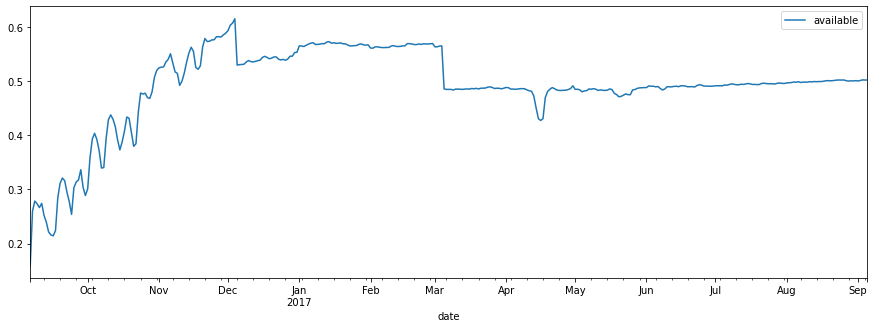

In [10]:
df_daily_boston.plot.line(figsize=(15,5))

- We can see that the availability rate starts low (15%) and grows until the beginning of December where it reaches +60%
- The highest availability rate happens on 2016-12-04 where it reaches 61%
- At the beginning of December there is a big drop in the rate, which is stable around 55% until March
- At the beginning of March there is another big drop in the rate, which is stable just below 50% until September
- There is a drop in availability at the end of April, where it drops ~ 6% and returns to the level before in just 3 days. It may be explained by the Boston marathon (https://en.wikipedia.org/wiki/2017_Boston_Marathon)

In [11]:
# create a new column with the weekday name of the date
df_boston_calendar['week_day'] = df_boston_calendar["date"].dt.weekday.astype(str)+'-'+df_boston_calendar["date"].dt.day_name()

In [12]:
# calculate percentage of availability per week day
df_week_day_boston = df_boston_calendar[['week_day','available']].groupby('week_day').mean()

<AxesSubplot:xlabel='week_day'>

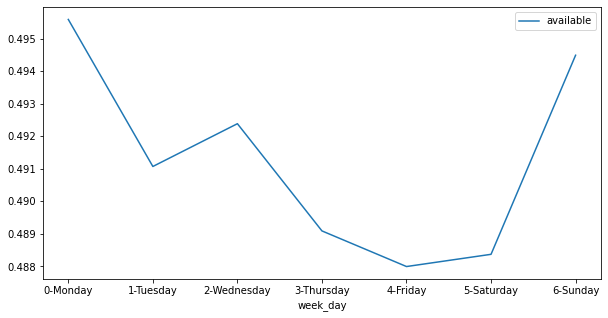

In [13]:
df_week_day_boston.plot.line(figsize=(10,5))

- Between Thursdays and Saturdays there is the lowest availability
- On Sundays and Mondays there is the highest availability

#### Analyzing Seattle data:

In [14]:
# looking into data
df_seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [15]:
df_seattle_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [16]:
# convert date to datetime type
df_seattle_calendar['date'] = pd.to_datetime(df_seattle_calendar['date'])
df_seattle_calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [17]:
# convert availabe column into binary
df_seattle_calendar['available'] = df_seattle_calendar['available'].apply(lambda x: 1 if x == 't' else 0)

In [18]:
# calculate percentage of available properties
df_seattle_calendar['available'].mean()

0.6706100160020666

In [19]:
# calculate percentage of availability per day
df_daily_seattle = df_seattle_calendar[['date','available']].groupby('date').mean()#.reset_index()
df_daily_seattle.head()

,available
date,
2016-01-04,0.454426
2016-01-05,0.488999
2016-01-06,0.478261
2016-01-07,0.465165
2016-01-08,0.466737


In [20]:
# look at the highest availability rate
df_daily_seattle.sort_values(by='available', ascending=False).head(1)

,available
date,
2017-01-01,0.765322


<AxesSubplot:xlabel='date'>

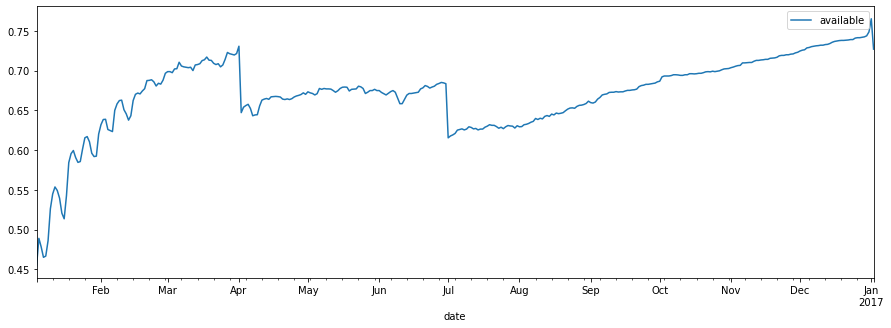

In [21]:
df_daily_seattle.plot.line(figsize=(15,5))

- We can see that the availability rate starts low in January and grows until the beginning of April where it reaches +70%
- At the beginning of April there is a big drop in the rate, which is stable around 67% until March
- At the beginning of July there is another big drop in the rate that comes close to 60%
- Between July and January the rate grows evenly until the end of December, reaching a peak of 76% and falls again

In [22]:
# create a new column with the weekday name of the date
df_seattle_calendar['week_day'] = df_seattle_calendar["date"].dt.weekday.astype(str)+'-'+df_seattle_calendar["date"].dt.day_name()

In [23]:
# calculate percentage of availability per weekday
df_week_day_seattle = df_seattle_calendar[['week_day','available']].groupby('week_day').mean()

<AxesSubplot:xlabel='week_day'>

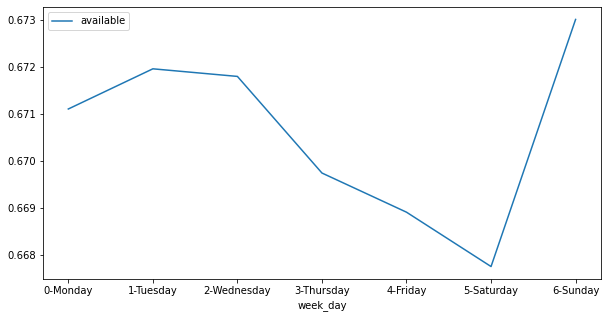

In [24]:
df_week_day_seattle.plot.line(figsize=(10,5))

- Saturday is the day with the lowest availability
- Between Sunday and Wednesday are the highest availability rates

#### Comparing Boston and Seattle:

Analyzing the daily rate and taking the fact that one dataset starts in September and the other in January, the curves behave very similarly:
- Growth for 3 months
- First big drop
- Stability for another 3 months
- Second big drop

The main differences are:
- After the second big drop, in Seattle the availability rate follows an upward trend. Boston is stable
- The availability rate in Seattle (67%) is generally higher than in Boston (49%)
- There is a drop in the availability rate at the end of April in Boston that may be explained by the Boston marathon (https://en.wikipedia.org/wiki/2017_Boston_Marathon)


Analyzing the rate per day of the week, we observe that:
- In general Thursday, Friday and Saturday are the days with less availability, but in Boston the day with less availability is Friday and in Seattle it's Saturday
- In Boston the days with the highest availability are Sunday and Monday respectively, while in Seattle it is Sunday and Tuesday followed closely by Wednesday
- The day with the lowest availability in Seattle (Saturday) has a much higher availability rate than the day with the highest availability in Boston (Monday)